In [7]:
import numpy as np
import sklearn.datasets as dataset
import sklearn.neighbors as neighbors
import matplotlib.pyplot  as plt

from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

In [2]:
data, labels = dataset.load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


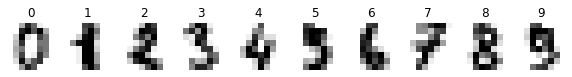

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,1))
for ax, image, label in zip(axes, data, labels):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

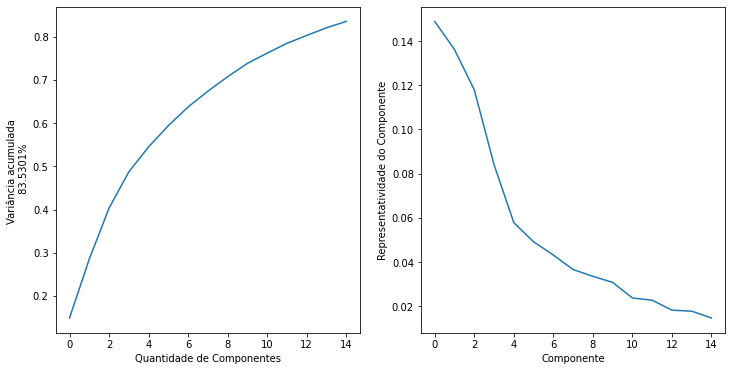

In [14]:
pca = PCA(15)
pca = pca.fit(data)
components = pca.transform(data)

fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].plot(np.cumsum(pca.explained_variance_ratio_))
axes[0].set(xlabel='Quantidade de Componentes', ylabel = 'Variância acumulada \n %7.4f%%'%(sum(pca.explained_variance_ratio_)*100))

axes[1].plot(pca.explained_variance_ratio_)
axes[1].set(xlabel='Componente', ylabel = 'Representatividade do Componente')
plt.show()

<Figure size 720x720 with 0 Axes>

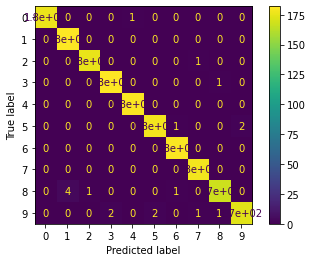

In [15]:
knn = neighbors.KNeighborsClassifier()
knn = knn.fit(components,labels)

plt.figure(figsize=(10,10))
plot_confusion_matrix(knn, components, labels,include_values=True) 
plt.show()